Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
enrollment_fn = 'enrollments.csv'
engagement_fn = 'daily_engagement.csv'
submissions_fn = 'project_submissions.csv'

def read_data(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollment = read_data(enrollment_fn)
daily_engagement = read_data(engagement_fn)
project_submissions = read_data(submissions_fn)

In [3]:
enrollment[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

## Fixing Data Types

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        try:
            return dt.strptime(date, '%Y-%m-%d')
        except:
            pass
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [5]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [7]:
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [8]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

unique_enrolled_students = set()
for enrollment in enrollments:
    unique_enrolled_students.add(enrollment['account_key'])
    
unique_engaged_students = set()
for engagement_record in daily_engagement:
    unique_engaged_students.add(engagement_record['acct'])

unique_project_submitters = set()
for submission in project_submissions:
    unique_project_submitters.add(submission['account_key'])



## Problems in the Data

In [9]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]
    


In [10]:
print(daily_engagement[400]['account_key'])

2


## Missing Engagement Records

In [11]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
enrolled_not_engaged = 0
for enrollment_record in enrollments:
    if enrollment_record['account_key'] not in unique_engaged_students:
        enrolled_not_engaged += 1

        
print(enrolled_not_engaged)
        

71


## Checking for More Problem Records

In [12]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
enrolled_not_engaged = 0
for enrollment_record in enrollments:
    if enrollment_record['account_key'] not in unique_engaged_students and (enrollment_record['days_to_cancel'] == None or \
                                                                           enrollment_record['days_to_cancel'] != 0):
        enrolled_not_engaged += 1
    
        
print(enrolled_not_engaged)
        

3


## Tracking Down the Remaining Problems

In [13]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [14]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [15]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [16]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}


for student in non_udacity_enrollments:
    if not student['is_canceled'] or student['days_to_cancel'] > 7:
        account_key = student['account_key']
        join_date = student['join_date']
        
        if account_key not in paid_students or \
        join_date > paid_students[account_key]:   # only add the most recent enrollment date
            paid_students[account_key] = join_date
            
print(len(paid_students))
        

995


## Getting Data from First Week

In [17]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [18]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data
    
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagements = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagements))
print(len(paid_submissions))


1293
134549
3618


In [77]:
paid_engagement_in_first_week = []

for engagement in paid_engagements:
    account_key = engagement['account_key']
    engagement_date = engagement['utc_date']
    if engagement['num_courses_visited'] >= 1:
        engagement['has_visited'] = 1
    else:
        engagement['has_visited'] = 0
    if account_key in paid_students:
        join_date = paid_students[account_key]
        if within_one_week(join_date, engagement_date):
            paid_engagement_in_first_week.append(engagement)
            
paid_engagement_in_first_week[2]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)),
             ('num_courses_visited', 2),
             ('total_minutes_visited', 53.6337463333),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0'),
             ('has_visited', 1)])

## Exploring Student Engagement

In [79]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
    
engagement_by_account['2']

[OrderedDict([('utc_date', datetime.datetime(2015, 6, 8, 0, 0)),
              ('num_courses_visited', 0),
              ('total_minutes_visited', 0.0),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '2'),
              ('has_visited', 0)]),
 OrderedDict([('utc_date', datetime.datetime(2015, 6, 9, 0, 0)),
              ('num_courses_visited', 0),
              ('total_minutes_visited', 0.0),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '2'),
              ('has_visited', 0)]),
 OrderedDict([('utc_date', datetime.datetime(2015, 6, 10, 0, 0)),
              ('num_courses_visited', 0),
              ('total_minutes_visited', 0.0),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '2'),
              ('has_visited', 0)]),
 OrderedDict([('utc_date', datetime.datetime(2015, 6, 11, 0, 0)),
              (

In [80]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes


In [81]:
import numpy as np

total_minutes = list(total_minutes_by_account.values())
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))


Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [82]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

student_with_max_minutes = None
max_minutes = 0

for account, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = account

print(student_with_max_minutes)
max_minutes


163


3564.7332644989997

## Lessons Completed in First Week

In [83]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

lessons_by_account = {}

for student, engagement in engagement_by_account.items():
    total_lessons_completed = 0
    for entry in engagement:
        total_lessons_completed += int(entry['lessons_completed'])
    lessons_by_account[student] = total_lessons_completed
    
total_lessons_completed = list(lessons_by_account.values())

print(np.mean(total_lessons_completed))
print(np.std(total_lessons_completed))
print(np.min(total_lessons_completed))
print(np.max(total_lessons_completed))
      
student_with_most_lessons = None
most_lessons = 0

for entry, lessons in lessons_by_account.items():
    if lessons > most_lessons:
        most_lessons = lessons
        student_with_most_lessons = entry
    
print('The student with the most lessons completed has a total of %0.2f minutes accross %d lessons' \
   % (total_minutes_by_account[student_with_most_lessons], most_lessons))
print('The student with the most minutes has a total of %d lessons completed for %0.2f minutes.' \
      % (lessons_by_account[student_with_max_minutes], max_minutes))

1.63618090452
3.00256129983
0
36
The student with the most lessons completed has a total of 1689.19 minutes accross 36 lessons
The student with the most minutes has a total of 20 lessons completed for 3564.73 minutes.


In [84]:
total_minutes = list(total_minutes_by_account.values())
total_lessons = list(lessons_by_account.values())
# print(total_minutes)
# print(total_lessons)
from scipy.stats.stats import pearsonr
pearsonr(total_minutes, total_lessons)

(0.76243102872174751, 6.2389129236974413e-190)

In [125]:
# Creates a dictionary where the keys are the account keys and the values are ordered dicts of each entry for that account
# Returns a dictionary
def create_ordered_account_dict(data):
    account_dict = defaultdict(list)
    for entry in data:
        account_key = entry['account_key']
        account_dict[account_key].append(entry)
    return account_dict

engagement_by_account = create_ordered_account_dict(paid_engagement_in_first_week)
submissions_by_account = create_ordered_account_dict(paid_submissions)

# Creates a dictionary where the keys are the account keys and the values are a list of the field_name passed to the function
# Takes in the dictionary create by create_ordered_account_dict and returns a dictionary with lists as values
def get_total_data_for_account(data, field_name):
    account_totals = {}
    for account, entry in data.items():
        account_key = account
        statistic = 0
        for information in entry:
            statistic += (information[field_name])
        account_totals[account_key] = statistic
   
    return account_totals

total_minutes = get_total_data_for_account(engagement_by_account, 'total_minutes_visited')
total_lessons = get_total_data_for_account(engagement_by_account, 'lessons_completed')
total_num_courses_visited = get_total_data_for_account(engagement_by_account, 'has_visited')

def get_statistics(dictionary_of_stats):
    list_of_numbers = list(dictionary_of_stats.values())
    print('Average:' , np.mean(list_of_numbers))
    print('Standard deviation:' , np.std(list_of_numbers))
    print('Minimum value:' , np.min(list_of_numbers))
    print('Maximum value:' , np.max(list_of_numbers),'\n')
      
get_statistics(total_minutes)
get_statistics(total_lessons)
get_statistics(total_num_courses_visited)


Average: 306.708326753
Standard deviation: 412.996933409
Mininum value: 0.0
Maximum value: 3564.7332645 

Average: 1.63618090452
Standard deviation: 3.00256129983
Mininum value: 0
Maximum value: 36 

Average: 2.86733668342
Standard deviation: 2.25519800292
Mininum value: 0
Maximum value: 7 



## Number of Visits in First Week

In [126]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

get_statistics(total_num_courses_visited)

Average: 2.86733668342
Standard deviation: 2.25519800292
Mininum value: 0
Maximum value: 7 



## Splitting out Passing Students

In [127]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_account_keys = set()
non_passing_account_keys = set()

for entry in paid_submissions:
    account_key = entry['account_key']
    lesson_key = entry['lesson_key']
    rating = entry['assigned_rating']
    
    if lesson_key in subway_project_lesson_keys:
        if (rating == 'PASSED') or (rating == 'DISTINCTION'):
            passing_account_keys.add(account_key)

print(len(passing_account_keys))



647


In [128]:
passing_engagement = []
non_passing_engagement = []

for entry in paid_engagement_in_first_week:
    account_key = entry['account_key']
    if account_key in passing_account_keys:
        passing_engagement.append(entry)
    else:
        non_passing_engagement.append(entry)
        
print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [137]:
print(total_minutes)
#print(total_lessons)
#print(total_num_courses_visited)

{'0': 494.88049616599994, '1': 18.576384666670002, '2': 0.0, '3': 0.0, '4': 33.3214046667, '5': 329.7578566663, '6': 780.4545511666701, '7': 104.20388850009999, '8': 989.113641833, '9': 448.471384167, '10': 130.12347833367, '11': 0.0, '12': 179.4719088333, '13': 1013.3833969996999, '14': 65.6221875, '15': 983.375040335, '16': 119.12030049999998, '17': 235.49969150033, '18': 155.1361575, '19': 0.0, '20': 447.93897783336996, '21': 931.1036911666699, '22': 657.2052335000001, '23': 1591.3228143334, '24': 943.188117167, '25': 0.0, '26': 430.801675833, '27': 1579.12122666663, '28': 766.256315667, '29': 556.1906033333, '30': 69.6578351667, '31': 0.0, '32': 123.2915048333, '33': 253.9870258334, '34': 180.413814, '35': 765.6402170004, '36': 809.2138958339, '37': 1378.195091668, '38': 0.0, '39': 1001.5888595, '40': 478.21952616690004, '41': 511.925391, '42': 576.4643026663, '43': 88.822038, '44': 0.0, '45': 0.0, '46': 26.1189351667, '47': 854.8288881656, '48': 1055.6871896667, '49': 0.0, '50': 4

In [155]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).


# dict of total minutes for each account key: total_minutes
# dict of total number of courses visited for each account key: total_num_courses_visited
# dict of total lessons completed for each account key: total_lessons_completed

def compare_passing_non_passing(data):
    for key, entry in data.items():
        if key in passing_account_keys:
            passing_data[key] = entry
        else:
            non_passing_data[key] = entry
        
    return passing_data, non_passing_data

#passing_minutes, non_passing_minutes = compare_passing_non_passing(total_minutes)
passing_lessons, non_passing_lessons = compare_passing_non_passing(total_lessons)
#passing_courses, non_passing_courses = compare_passing_non_passing(total_num_courses_visited) 


print('Data for passing_minutes:')
get_statistics(compare_passing_non_passing(total_minutes)[0])
print('Data for non_passing_minutes')
get_statistics(compare_passing_non_passing(total_minutes)[1])


print('Data for passing_lessons:')
get_statistics(compare_passing_non_passing(total_lessons)[0])
print('Data for non_passing_lessons')
get_statistics(compare_passing_non_passing(total_lessons)[1])

print('Data for passing_days:')
get_statistics(compare_passing_non_passing(total_num_courses_visited)[0])
print('Data for non_passing_days')
get_statistics(compare_passing_non_passing(total_num_courses_visited)[1])


Data for passing_minutes:
Average: 394.586046484
Standard deviation: 448.499519327
Mininum value: 0.0
Maximum value: 3564.7332645 

Data for non_passing_minutes
Average: 143.326474267
Standard deviation: 269.538619011
Mininum value: 0.0
Maximum value: 1768.52274933 

Data for passing_lessons:
Average: 2.05255023184
Standard deviation: 3.14222705558
Mininum value: 0
Maximum value: 36 

Data for non_passing_lessons
Average: 0.862068965517
Standard deviation: 2.54915994183
Mininum value: 0
Maximum value: 27 

Data for passing_days:
Average: 3.38485316847
Standard deviation: 2.25882147092
Mininum value: 0
Maximum value: 7 

Data for non_passing_days
Average: 1.90517241379
Standard deviation: 1.90573144136
Mininum value: 0
Maximum value: 7 



## Making Histograms

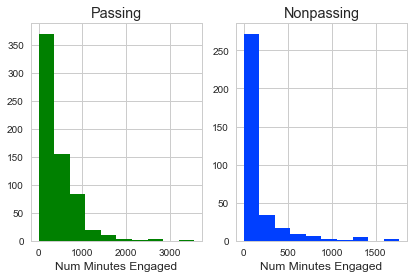

In [205]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

passing_minutes, non_passing_minutes = compare_passing_non_passing(total_minutes)

plt.subplot(1,2,1)
plt.hist(list(passing_minutes.values()), color = 'g')
plt.title('Passing')
plt.xlabel('Num Minutes Engaged')
plt.subplot(1,2,2)
plt.hist(list(non_passing_minutes.values()))
plt.title('Nonpassing')
plt.xlabel('Num Minutes Engaged')
style.use('seaborn-bright')

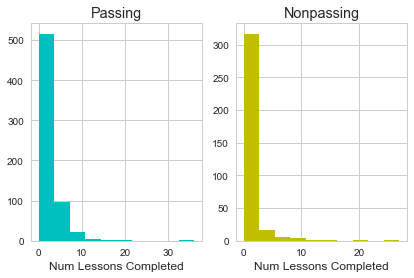

In [204]:
passing_lessons, non_passing_lessons = compare_passing_non_passing(total_lessons)

plt.subplot(1,2,1)
plt.hist(list(passing_lessons.values()), color = 'c')
plt.title('Passing')
plt.xlabel('Num Lessons Completed')
plt.subplot(1,2,2)
plt.hist(list(non_passing_lessons.values()), color = 'y')
plt.title('Nonpassing')
plt.xlabel('Num Lessons Completed')
style.use('seaborn-bright')

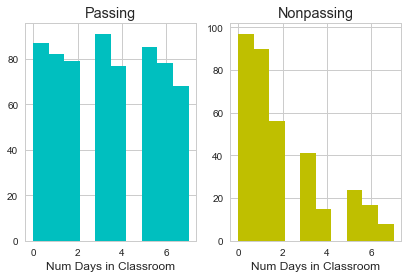

In [203]:
passing_days, non_passing_days = compare_passing_non_passing(total_num_courses_visited)

plt.subplot(1,2,1)
plt.hist(list(passing_days.values()), color = 'c')
plt.title('Passing')
plt.xlabel('Num Days in Classroom')
plt.subplot(1,2,2)
plt.hist(list(non_passing_days.values()), color = 'y')
plt.title('Nonpassing')
plt.xlabel('Num Days in Classroom')
style.use('seaborn-muted')


## Improving Plots and Sharing Findings

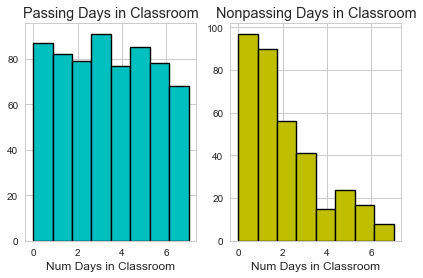

In [214]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
passing_days, non_passing_days = compare_passing_non_passing(total_num_courses_visited)

plt.subplot(1,2,1)
plt.hist(list(passing_days.values()), color = 'c', bins = 8, edgecolor = 'black', linewidth = 1.4)
plt.title('Passing Days in Classroom')
plt.xlabel('Num Days in Classroom')
plt.subplot(1,2,2)
plt.hist(list(non_passing_days.values()), color = 'y', bins = 8, edgecolor = 'black', linewidth = 1.4)
plt.title('Nonpassing Days in Classroom')
plt.xlabel('Num Days in Classroom')
style.use('seaborn-muted')

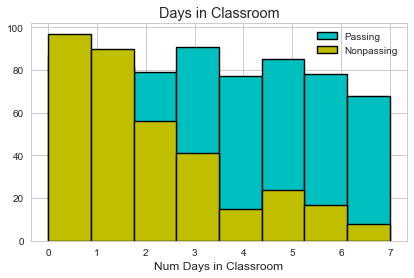

In [217]:
passing_days, non_passing_days = compare_passing_non_passing(total_num_courses_visited)

plt.hist(list(passing_days.values()), color = 'c', bins = 8, edgecolor = 'black', linewidth = 1.4)
plt.hist(list(non_passing_days.values()), color = 'y', bins = 8, edgecolor = 'black', linewidth = 1.4)
plt.legend(['Passing', 'Nonpassing'])
plt.title('Days in Classroom')
plt.xlabel('Num Days in Classroom')


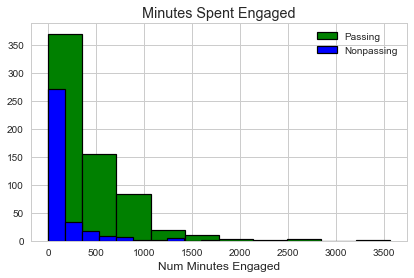

In [225]:
passing_minutes, non_passing_minutes = compare_passing_non_passing(total_minutes)

plt.hist(list(passing_minutes.values()), color = 'g', edgecolor = 'black', linewidth = 1.2)
plt.hist(list(non_passing_minutes.values()), color = 'b', edgecolor='black', linewidth = 1.2)
plt.legend(['Passing', 'Nonpassing'])
plt.title('Minutes Spent Engaged')
plt.xlabel('Num Minutes Engaged')
